# Stock Price Predictions

[link](https://www.youtube.com/watch?v=PuZY9q-aKLw&ab_channel=NeuralNine)

## Import Module

In [2]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
import pandas as pd
import numpy as np

## Load Data

In [25]:
company = 'ANTM.JK'

start = dt.datetime(2006,1,1)
end = dt.datetime(2021,5,1)

data = web.DataReader(company, 'yahoo', start, end)

## Preparing Data

In [26]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [27]:
prediction_days = 60

X_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    X_train.append(scaled_data[x - prediction_days: x, 0])
    y_train.append(scaled_data[x, 0])

In [28]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Build the Model

In [29]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) # Predict the next closing

In [30]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
model.fit(X_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
117/117 [==============================] - 13s 58ms/step - loss: 0.0053
Epoch 2/25
117/117 [==============================] - 7s 58ms/step - loss: 0.0019
Epoch 3/25
117/117 [==============================] - 7s 58ms/step - loss: 0.0018
Epoch 4/25
117/117 [==============================] - 7s 58ms/step - loss: 0.0017
Epoch 5/25
117/117 [==============================] - 7s 58ms/step - loss: 0.0015
Epoch 6/25
117/117 [==============================] - 7s 59ms/step - loss: 0.0012
Epoch 7/25
117/117 [==============================] - 7s 60ms/step - loss: 0.0012
Epoch 8/25
117/117 [==============================] - 7s 59ms/step - loss: 0.0011
Epoch 9/25
117/117 [==============================] - 7s 58ms/step - loss: 0.0012
Epoch 10/25
117/117 [==============================] - 7s 58ms/step - loss: 9.6249e-04
Epoch 11/25
117/117 [==============================] - 7s 59ms/step - loss: 0.0010
Epoch 12/25
117/117 [==============================] - 7s 59ms/step - loss: 9.6818e-04
Epoc

In [32]:
model.save('stock_model.h5')

## Load Test Data

In [35]:
test_start = dt.datetime(2021,5,1)
test_end = dt.datetime.now()

In [36]:
test_data = web.DataReader(company, 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

In [37]:
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

In [38]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

## Make Predictions on Test

In [39]:
X_test = []

for x in range(prediction_days, len(model_inputs)):
    X_test.append(model_inputs[x-prediction_days:x, 0])

In [40]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [41]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

## Visualize the Predictions

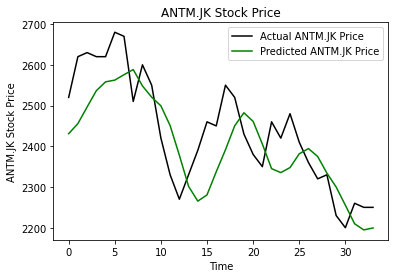

In [42]:
plt.plot(actual_prices, color='black', label=f"Actual {company} Price")
plt.plot(predicted_prices, color='green', label=f"Predicted {company} Price")
plt.title(f"{company} Stock Price")
plt.xlabel('Time')
plt.ylabel(f"{company} Stock Price")
plt.legend()
plt.show()

## Predict Next Days

In [43]:
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

In [44]:
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

Prediction: [[2211.246]]
